In [1]:
import matplotlib as plb
import numpy as np
import pickle
import time
import random
from random import uniform

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn import preprocessing

from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import jaccard_score
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import der_snr
from PyAstronomy import pyasl
import io
#from astropy.io import fits
import skmultilearn
from skmultilearn.adapt import MLkNN
from sklearn.cluster import DBSCAN 
from sklearn.datasets.samples_generator import make_blobs 
from sklearn.preprocessing import StandardScaler 

from sklearn import manifold, datasets 
from sklearn.cluster import AgglomerativeClustering 
from scipy.spatial import distance_matrix 
from sklearn.cluster import KMeans 
from sklearn.preprocessing import MinMaxScaler
from sklearn import linear_model

from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

import h5py
from testCases_v4a import *
from dnn_utils_v2 import sigmoid, sigmoid_backward, relu, relu_backward

from PIL import Image
from scipy import ndimage

import tensorflow as tf 
from tensorflow.python.framework import ops
from cnn_utils import *
from scipy import interpolate
import keras
from keras.utils import to_categorical

from keras import layers
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout, GlobalMaxPooling2D, GlobalAveragePooling2D
from keras.models import Model
from keras.preprocessing import image
from keras.utils import layer_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
import pydot
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model

import keras.backend as K
K.set_image_data_format('channels_last')
from sklearn.svm import LinearSVR

from sklearn.datasets import make_regression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import RidgeCV

from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.multioutput import RegressorChain

from sklearn.metrics import accuracy_score

from keras.models import Sequential
from keras.layers import Convolution2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense

from keras.utils import plot_model
from keras.layers import Input
from keras.layers.convolutional import Conv2D
from keras.layers.pooling import MaxPooling2D
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM

import tensorflow as tf
#from tensorflow import keras
#import keras
from keras.models import Sequential
from keras.layers import Dense
#from tensorflow.keras import layers
import linecache
import functools
import os
from pylab import *
import subprocess
import sys
from numpy import linalg as LA
#from astropy.stats import sigma_clip as sgc 
import pylab as p
%matplotlib inline


/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
Dumpfiles=["Database/Dumpfile-4450-4990-7000-10000-200-2-5-0.5-vsini-0-300-met-0-Vmicr2-Resolution60000",\
           "Database/Dumpfile-Random-lambda4450.00-4989.95-teff7000.0-11000.0-logg2.00-5.00-vsini0-300-meta0-Vmicr2-Resolution60000",\
           "Database/Dumpfile-Random-medium-lambda4450.00-4989.95-teff7000.0-11000.0-logg2.00-5.00-vsini0-300-meta0-Vmicr2-Resolution60000",\
           "Database/Dumpfile-Random-small-lambda4450.00-4989.95-teff7000.0-11000.0-logg2.00-5.00-vsini0-300-meta0-Vmicr2-Resolution60000",\
           "Database/Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-100-logg2.00-5.00-0.20-vsini0-300-meta0.00-0.00-0.50-Vmicr2.00-2.00-1.00-Resolution60000",\
           "Database/Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-100-logg2.00-5.00-0.10-vsini0-300-meta0.00-0.00-0.50-Vmicr2.00-2.00-1.00-Resolution60000",\
           "Database/Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-100-logg2.00-5.00-0.10-vsini0-300-meta0.00-0.00-0.50-Vmicr2.00-2.00-1.00-Resolution100000",\
           "Database/Dumpfile-lambda4450.00-4989.95-teff7000.0-11000.0-100-logg2.00-5.00-0.10-vsini0-300-meta0.00-0.00-0.50-Vmicr2.00-2.00-1.00-Resolution25000",\
           "Database/Dumpfile-random-meta-22000spectrum",\
           "Database/Dumpfile-random-meta-37500spectrum",\
           "Database/Dumpfile-random-meta-62000spectrum",\
           "Database/Dumpfile-test"]
Dump=Dumpfiles[8]
lamb=np.arange(4450.,4990,0.05)
print(Dump)
temp=np.loadtxt("Template/atSS02997-t009000g4.00-vrot000res060000-met+0.0-micr2.0s48.dat")

Database/Dumpfile-random-meta-22000spectrum


## Reading the Observations

# Unmark to run

! ls spectra/* | shuf > list_obs 
c=3.0*10**5 #speed of light
lst=np.loadtxt("list_obs",dtype=str)
Obs=np.zeros((len(lst),len(lamb)))
ii=0
for star in lst:
    spec=np.loadtxt(star)
    noise=der_snr.DER_SNR(spec[:,1])
    radialv, cc = pyasl.crosscorrRV(spec[:,0], spec[:,1], temp[:,0], temp[:,1], -200., 200., 0.1, skipedge=200)
    maxind = np.argmax(cc)
    plt.plot(spec[:,0], spec[:,1])
    wavelength=spec[:,0]*(1.-radialv[maxind]/c)
    interpfunc = interpolate.interp1d(wavelength,spec[:,1], kind='linear')
    flux=interpfunc(lamb)
    Obs[ii,:]=flux
    #    plt.plot(lamb,flux)
    print (ii,"- Cross-correlation function is maximized at dRV = ", radialv[maxind], \
           " km/s for", str(star), "with a noise of", round(noise,4))
    ii+=1
    
    
np.savetxt("stackedspectra.txt", Obs, fmt="%.9f")
    
    

lst=np.loadtxt("list_noisy",dtype=str)
Obs=np.zeros((len(lst),len(lamb)))
ii=0
for star in lst:
    spec=np.loadtxt(star)
    noise=der_snr.DER_SNR(spec[:,1])
    Obs[ii,:]=spec[:,1]
    ii+=1

np.savetxt("stackedspectra_noisy.txt", Obs, fmt="%.9f")


## Reading the Database model for training and Data augmentation

In [3]:
 



# Normal Data
grid=pd.read_pickle(Dump)
nmod=len(grid) # Number of spectra in learning database
nwav=len(grid[0][0]) # Numer of data point in each spectra
mat=np.zeros((len(grid), nwav), 'Float32') # nmod by nmwav matrix of learning database matrix
teff=[] # Teff of each spectrum
logg=[] # logg of each spectrum
vrot=[] # vrot of each spectrum
metal=[] # vrot of each spectrum
SN=[]# Vmicr of each spectrum

for i in np.arange(nmod):
    mat[i,:]=grid[i][0]
    teff.append(grid[i][1])
    logg.append(grid[i][2])
    vrot.append(grid[i][3])
    metal.append(grid[i][4])
    #SN.append(grid[i][5])
   # micro.append(grid[i][5])
    if (i % 2000==0):
        print('Progress report', i,"th spectrum")

'''


# Data Augmentation

grid=pd.read_pickle(Dump)
nmod=len(grid) # Number of spectra in learning database
nwav=len(grid[0][0]) # Numer of data point in each spectra
mat=np.zeros((nmod*3, nwav), 'Float32') # nmod by nmwav matrix of learning database matrix
teff=[] # Teff of each spectrum
logg=[] # logg of each spectrum
vrot=[] # vrot of each spectrum
metal=[] # vrot of each spectrum
SN=[]# Vmicr of each spectrum

for i in np.arange(nmod):
    mat[i,:]=grid[i][0]
    teff.append(grid[i][1])
    logg.append(grid[i][2])
    vrot.append(grid[i][3])
    metal.append(grid[i][4])

    #SN.append(grid[i][5])
   # micro.append(grid[i][5])
    if (i % 1000==0):
        print('Progress report', i,"th spectrum")

for i in range(nmod,nmod*2,1):
    SN=uniform(20,300)
    mat[i,:]=np.random.normal(grid[i-nmod][0], 1/SN)
    teff.append(grid[i-nmod][1])
    logg.append(grid[i-nmod][2])
    vrot.append(grid[i-nmod][3])
    metal.append(grid[i-nmod][4])

    if (i % 1000==0):
        print('Progress report', i,"th spectrum")

for i in range(nmod*2,nmod*3,1):
    factor=uniform(0.9,1.1)
    SN=uniform(20,300)

    mat[i,:]=np.random.normal(grid[i-nmod*2][0]*factor, 1/SN)
    teff.append(grid[i-nmod*2][1])
    logg.append(grid[i-nmod*2][2])
    vrot.append(grid[i-nmod*2][3])
    metal.append(grid[i-nmod*2][4])

    if (i % 1000==0):
        print('Progress report', i,"th spectrum")


for i in range(nmod*3,nmod*4,1):
    factor=uniform(0.9,1.1)
    SN=uniform(20,300)
    mat[i,:]=grid[i-nmod*3][0]*factor

    teff.append(grid[i-nmod*3][1])
    logg.append(grid[i-nmod*3][2])
    vrot.append(grid[i-nmod*3][3])
    metal.append(grid[i-nmod*3][4])

    if (i % 1000==0):
        print('Progress report', i,"th spectrum")

# distortion of the flux with a triangular function        


for i in range(nmod*4,nmod*5,1):
    z=uniform(4450.05,4989.95)
    x=np.hstack(( 4450.,z,4990. )).ravel()
    y=[0.975,1.025,0.975]

    interpfunc = interpolate.interp1d(x,y, kind='linear')
    flux=interpfunc(lamb)
    #SN=uniform(20,300)
    
    mat[i,:]=grid[i-nmod*4][0]*flux
    teff.append(grid[i-nmod*4][1])
    logg.append(grid[i-nmod*4][2])
    vrot.append(grid[i-nmod*4][3])
    metal.append(grid[i-nmod*4][4])

    if (i % 1000==0):
        print('Progress report', i,"th spectrum")
       
    
for i in range(nmod*5,nmod*6,1):
    z=uniform(4450.05,4989.95)
    x=np.hstack(( 4450.,z,4990. )).ravel()
    y=[0.975,1.025,0.975]
    interpfunc = interpolate.interp1d(x,y, kind='linear')
    flux=interpfunc(lamb)

    SN=uniform(20,300)

    mat[i,:]=np.random.normal(grid[i-nmod*5][0]*flux, 1/SN)
    teff.append(grid[i-nmod*5][1])
    logg.append(grid[i-nmod*5][2])
    vrot.append(grid[i-nmod*5][3])
    metal.append(grid[i-nmod*5][4])

    if (i % 1000==0):
        print('Progress report', i,"th spectrum")
        
        

nmod=nmod*3    

'''
 


# np.unique(teff), np.unique(logg), np.unique(vrot), np.unique(meta)
print(mat.shape)

<ipython-input-3-86158397a42a>:5: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  mat=np.zeros((len(grid), nwav), 'Float32') # nmod by nmwav matrix of learning database matrix


Progress report 0 th spectrum
Progress report 2000 th spectrum
Progress report 4000 th spectrum
Progress report 6000 th spectrum
Progress report 8000 th spectrum
Progress report 10000 th spectrum
Progress report 12000 th spectrum
Progress report 14000 th spectrum
Progress report 16000 th spectrum
Progress report 18000 th spectrum
Progress report 20000 th spectrum
Progress report 22000 th spectrum
(22011, 10800)


## Plotting the Database Dump-File

In [ ]:
plt.imshow(mat, aspect='auto',cmap='terrain',extent=[lamb.min(),lamb.max(),nmod,0])
plt.title('Colormapppp') 
plt.xlabel('Wavelength')
plt.ylabel('Models')

plt.colorbar()

## Plotting Random spectra from database

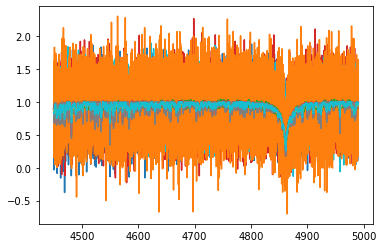

In [7]:
plt.Figure()
for i in np.arange(100):
    plt.plot(lamb,Observations2[i,:])
plt.show()

# PCA

In [4]:
mn=np.mean(mat, axis=0)
C=mat-mn
e, s, aaa=np.linalg.linalg.svd(np.dot(np.transpose(C),C), full_matrices=False)

In [ ]:
del mat, C

In [5]:
nk=50
p=np.zeros((nmod,nk),'Float32')
for k in np.arange(nk):
    for i in np.arange(nmod):
        p[i,k]=np.dot((mat[i,:]-mn),e[:,k])



lst=np.loadtxt("list_obs_noSNRV_meta",dtype=str)
lst2=np.loadtxt("list_spectra_60000_meta",dtype=str)


Observations=np.loadtxt("stackedspectra_noSNRV_meta.txt",dtype=float)
Observations.shape




Observations2=np.loadtxt("stackedspectra_with_meta.txt",dtype=float)
Observations2.shape


rho=np.zeros((Observations.shape[0],nk),'Float32')

for k in np.arange(nk):
    for i in np.arange(Observations.shape[0]):
        rho[i,k]=np.dot((Observations[i,:]-mn),e[:,k])

rho2=np.zeros((Observations2.shape[0],nk),'Float32')

for k in np.arange(nk):
    for i in np.arange(Observations2.shape[0]):
        rho2[i,k]=np.dot((Observations2[i,:]-mn),e[:,k])
        
vsini=[]
for i in np.arange(len(lst)):
    vsini.append(float(lst[i][51:54]))
grav=[]
for i in np.arange(len(lst)):
    grav.append(float(lst[i][42:46]))
temp=[]
for i in np.arange(len(lst)):
    temp.append(float(lst[i][35:41]))
meta=[]
for i in np.arange(len(lst)):
    meta.append(float(lst[i][67:73]))


vsini2=[]
for i in np.arange(len(lst2)):
    vsini2.append(float(lst2[i][51:54]))
grav2=[]
for i in np.arange(len(lst2)):
    grav2.append(float(lst2[i][42:46]))
temp2=[]
for i in np.arange(len(lst2)):
    temp2.append(float(lst2[i][35:41]))
meta2=[]
for i in np.arange(len(lst2)):
    meta2.append(float(lst2[i][67:73]))
    
duration = 0.5  # seconds
freq = 440  # Hz
os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))    

<ipython-input-5-0b9c5d0a0aae>:2: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  p=np.zeros((nmod,nk),'Float32')
<ipython-input-5-0b9c5d0a0aae>:23: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  rho=np.zeros((Observations.shape[0],nk),'Float32')
<ipython-input-5-0b9c5d0a0aae>:29: DeprecationWarning: Numeric-style type codes are deprecated and will result in an error in the future.
  rho2=np.zeros((Observations2.shape[0],nk),'Float32')


0

## Projecting the Observations

[]

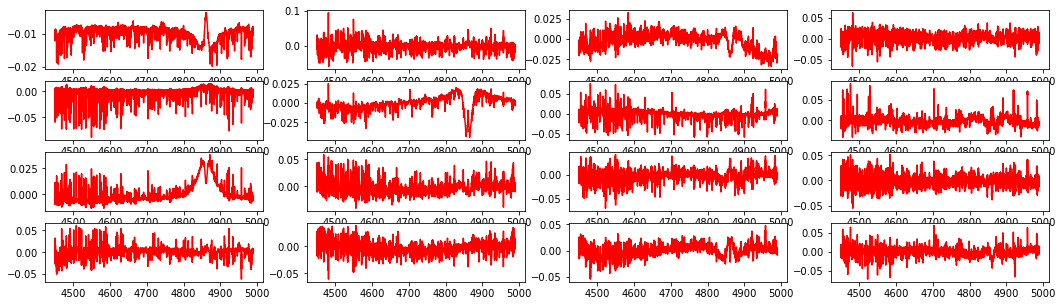

In [9]:
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(18, 5))

ax[0,0].plot(lamb,e.T[0,:],'r')
ax[1,0].plot(lamb,e.T[1,:],'r')
ax[2,0].plot(lamb,e.T[2,:],'r')
ax[3,0].plot(lamb,e.T[3,:],'r')

ax[0,1].plot(lamb,e.T[4,:],'r')
ax[1,1].plot(lamb,e.T[5,:],'r')
ax[2,1].plot(lamb,e.T[6,:],'r')
ax[3,1].plot(lamb,e.T[7,:],'r')

ax[0,2].plot(lamb,e.T[8,:],'r')
ax[1,2].plot(lamb,e.T[9,:],'r')
ax[2,2].plot(lamb,e.T[10,:],'r')
ax[3,2].plot(lamb,e.T[11,:],'r')

ax[0,3].plot(lamb,e.T[12,:],'r')
ax[1,3].plot(lamb,e.T[13,:],'r')
ax[2,3].plot(lamb,e.T[14,:],'r')
ax[3,3].plot(lamb,e.T[15,:],'r')
plt.plot()
#p.tight_layout()

[]

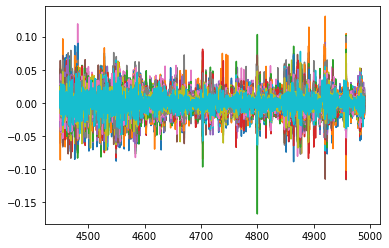

In [11]:
for i in np.arange(100):
    plt.plot(lamb,e.T[i,:])
plt.plot()

## KERAS Fully connected

## $T_{eff}$

In [6]:
'''
y=np.zeros((nmod, 3))

for i in np.arange(nmod):
    y[i][0]=teff[i]
    y[i][1]=logg[i]
    y[i][2]=vrot[i]
#    y[i][3]=SN[i]

out_dim=y.shape[1]   
print("Targets have the dimension of ", y.shape)   
X=mat
print("The features have the dimension of", X.shape)
#y=np.array(teff)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
in_dim=X.shape[1]

#len(np.unique(y))
#y=MultiLabelBinarizer().fit_transform(y)
#y.shape

'''


y=np.zeros((len(p)))

for i in np.arange(len(p)):
    y[i]=teff[i]
#    y[i]=logg[i]
#    y[i]=vrot[i]
#    y[i]=metal[i]
out_dim=y.shape[0]        
print("Targets have the dimension of ", y.shape)   
X=p
print("The features have the dimension of", X.shape)
#y=np.array(teff)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
in_dim=X.shape[1]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=3,shuffle=True)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Targets have the dimension of  (22011,)
The features have the dimension of (22011, 50)
Train set: (17608, 50) (17608,)
Test set: (4403, 50) (4403,)


In [28]:
#early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001,patience=10, verbose=1, mode='auto') 
#early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, mode='min') 

model = Sequential()
model.add(layers.Dense(265, activation='relu', input_dim=in_dim))
model.add(Dropout(0.3))
#model.add(layers.Dense(1024, activation='relu', input_dim=in_dim))
#model.add(Dropout(0.3))
#model.add(layers.Dense(512, activation='relu'))
#model.add(Dropout(0.5))
#model.add(layers.Dense(512, activation='relu'))
#model.add(Dropout(0.3))
model.add(layers.Dense(10, activation='relu'))
#model.add(layers.Dense(1, activation='softmax'))
model.add(Dense(out_dim,activation='linear'))
model.compile(loss="mean_squared_error", optimizer="adam",metrics=["accuracy"])


#history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=50, batch_size=20)
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=500, batch_size=64)

duration = 0.5  # seconds
freq = 440  # Hz
os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))    



Epoch 1/500
276/276 [==============================] - 2s 9ms/step - loss: 78955072.0000 - accuracy: 0.0000e+00 - val_loss: 69996912.0000 - val_accuracy: 0.0000e+00
Epoch 2/500
276/276 [==============================] - 2s 9ms/step - loss: 44378024.0000 - accuracy: 0.0000e+00 - val_loss: 17014880.0000 - val_accuracy: 0.0000e+00
Epoch 3/500
276/276 [==============================] - 2s 9ms/step - loss: 5368419.5000 - accuracy: 0.0000e+00 - val_loss: 718121.5625 - val_accuracy: 0.0000e+00
Epoch 4/500
276/276 [==============================] - 2s 9ms/step - loss: 673810.8125 - accuracy: 0.0000e+00 - val_loss: 291097.2500 - val_accuracy: 0.0000e+00
Epoch 5/500
276/276 [==============================] - 2s 9ms/step - loss: 545106.8125 - accuracy: 0.0000e+00 - val_loss: 235380.5312 - val_accuracy: 0.0000e+00
Epoch 6/500
276/276 [==============================] - 2s 9ms/step - loss: 500025.4688 - accuracy: 0.0000e+00 - val_loss: 198105.7031 - val_accuracy: 0.0000e+00
Epoch 7/500
276/276 [====

Epoch 52/500
276/276 [==============================] - 2s 8ms/step - loss: 250589.1719 - accuracy: 0.0000e+00 - val_loss: 17173.5781 - val_accuracy: 0.0000e+00
Epoch 53/500
276/276 [==============================] - 2s 8ms/step - loss: 245408.1094 - accuracy: 5.6792e-05 - val_loss: 18503.8613 - val_accuracy: 0.0000e+00
Epoch 54/500
276/276 [==============================] - 2s 8ms/step - loss: 250533.1562 - accuracy: 0.0000e+00 - val_loss: 16382.6641 - val_accuracy: 0.0000e+00
Epoch 55/500
276/276 [==============================] - 2s 8ms/step - loss: 243699.3438 - accuracy: 0.0000e+00 - val_loss: 17891.7500 - val_accuracy: 0.0000e+00
Epoch 56/500
276/276 [==============================] - 2s 8ms/step - loss: 249456.9688 - accuracy: 0.0000e+00 - val_loss: 17900.3301 - val_accuracy: 0.0000e+00
Epoch 57/500
276/276 [==============================] - 2s 8ms/step - loss: 242670.3281 - accuracy: 5.6792e-05 - val_loss: 18005.9082 - val_accuracy: 0.0000e+00
Epoch 58/500
276/276 [============

Epoch 103/500
276/276 [==============================] - 2s 8ms/step - loss: 211207.7969 - accuracy: 0.0000e+00 - val_loss: 13173.0879 - val_accuracy: 0.0000e+00
Epoch 104/500
276/276 [==============================] - 2s 8ms/step - loss: 213073.0781 - accuracy: 5.6792e-05 - val_loss: 12844.2910 - val_accuracy: 0.0000e+00
Epoch 105/500
276/276 [==============================] - 2s 8ms/step - loss: 210348.5781 - accuracy: 5.6792e-05 - val_loss: 14088.8301 - val_accuracy: 0.0000e+00
Epoch 106/500
276/276 [==============================] - 2s 8ms/step - loss: 213667.9688 - accuracy: 0.0000e+00 - val_loss: 14500.8994 - val_accuracy: 0.0000e+00
Epoch 107/500
276/276 [==============================] - 2s 8ms/step - loss: 210203.6406 - accuracy: 5.6792e-05 - val_loss: 15379.0703 - val_accuracy: 0.0000e+00
Epoch 108/500
276/276 [==============================] - 2s 8ms/step - loss: 212127.6094 - accuracy: 0.0000e+00 - val_loss: 13628.9170 - val_accuracy: 0.0000e+00
Epoch 109/500
276/276 [=====

276/276 [==============================] - 2s 8ms/step - loss: 184389.0938 - accuracy: 0.0000e+00 - val_loss: 12476.7939 - val_accuracy: 0.0000e+00
Epoch 204/500
276/276 [==============================] - 2s 8ms/step - loss: 180285.2656 - accuracy: 5.6792e-05 - val_loss: 12154.9121 - val_accuracy: 0.0000e+00
Epoch 205/500
276/276 [==============================] - 2s 8ms/step - loss: 182990.7500 - accuracy: 5.6792e-05 - val_loss: 11703.3555 - val_accuracy: 0.0000e+00
Epoch 206/500
276/276 [==============================] - 2s 8ms/step - loss: 181817.5781 - accuracy: 0.0000e+00 - val_loss: 12840.8018 - val_accuracy: 0.0000e+00
Epoch 207/500
276/276 [==============================] - 2s 8ms/step - loss: 182501.8125 - accuracy: 0.0000e+00 - val_loss: 17979.5098 - val_accuracy: 0.0000e+00
Epoch 208/500
276/276 [==============================] - 2s 8ms/step - loss: 182797.0781 - accuracy: 0.0000e+00 - val_loss: 12489.5107 - val_accuracy: 0.0000e+00
Epoch 209/500
276/276 [===================

276/276 [==============================] - 2s 8ms/step - loss: 166243.8438 - accuracy: 5.6792e-05 - val_loss: 11231.3779 - val_accuracy: 0.0000e+00
Epoch 304/500
276/276 [==============================] - 2s 8ms/step - loss: 168648.3594 - accuracy: 0.0000e+00 - val_loss: 13191.1758 - val_accuracy: 2.2712e-04
Epoch 305/500
276/276 [==============================] - 2s 8ms/step - loss: 165265.0469 - accuracy: 2.2717e-04 - val_loss: 11640.8984 - val_accuracy: 2.2712e-04
Epoch 306/500
276/276 [==============================] - 2s 8ms/step - loss: 169961.5469 - accuracy: 5.6792e-05 - val_loss: 12561.4072 - val_accuracy: 2.2712e-04
Epoch 307/500
276/276 [==============================] - 2s 8ms/step - loss: 170372.4062 - accuracy: 5.6792e-05 - val_loss: 12931.5488 - val_accuracy: 0.0000e+00
Epoch 308/500
276/276 [==============================] - 2s 8ms/step - loss: 169708.4062 - accuracy: 5.6792e-05 - val_loss: 12052.6660 - val_accuracy: 2.2712e-04
Epoch 309/500
276/276 [===================

276/276 [==============================] - 2s 8ms/step - loss: 158398.8750 - accuracy: 5.6792e-05 - val_loss: 11859.7939 - val_accuracy: 0.0000e+00
Epoch 404/500
276/276 [==============================] - 2s 8ms/step - loss: 160700.0625 - accuracy: 5.6792e-05 - val_loss: 12217.2168 - val_accuracy: 0.0000e+00
Epoch 405/500
276/276 [==============================] - 2s 8ms/step - loss: 161398.5781 - accuracy: 1.1358e-04 - val_loss: 11953.5996 - val_accuracy: 0.0000e+00
Epoch 406/500
276/276 [==============================] - 2s 8ms/step - loss: 157121.2188 - accuracy: 0.0000e+00 - val_loss: 12560.7490 - val_accuracy: 0.0000e+00
Epoch 407/500
276/276 [==============================] - 2s 8ms/step - loss: 159315.5625 - accuracy: 5.6792e-05 - val_loss: 12419.2998 - val_accuracy: 0.0000e+00
Epoch 408/500
276/276 [==============================] - 2s 8ms/step - loss: 159904.4219 - accuracy: 5.6792e-05 - val_loss: 12217.8438 - val_accuracy: 0.0000e+00
Epoch 409/500
276/276 [===================

0

In [29]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Min accuracy:', np.min(history.history['accuracy']))
print('Min loss:', np.min(history.history['val_loss']))

model.summary()
#plot_model(model)

Test loss: 12689.009765625
Test accuracy: 0.0
Min accuracy: 0.0
Min loss: 11111.2666015625
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_13 (Dense)             (None, 265)               13515     
_________________________________________________________________
dropout_7 (Dropout)          (None, 265)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 10)                2660      
_________________________________________________________________
dense_15 (Dense)             (None, 22011)             242121    
Total params: 258,296
Trainable params: 258,296
Non-trainable params: 0
_________________________________________________________________


[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

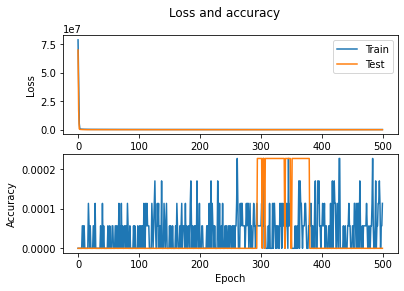

In [30]:
fig, ax = plt.subplots(2)
fig.suptitle('Loss and accuracy')


ax[0].plot(history.history['loss']) 
ax[0].plot(history.history['val_loss']) 
ax[0].set(xlabel='Epoch', ylabel='Loss') 
ax[0].legend(['Train', 'Test'], loc='upper right') 


ax[1].plot(history.history['accuracy'], label='accuracy')
ax[1].plot(history.history['val_accuracy'], label = 'val_accuracy')
ax[1].set(xlabel='Epoch', ylabel='Accuracy') 




[]

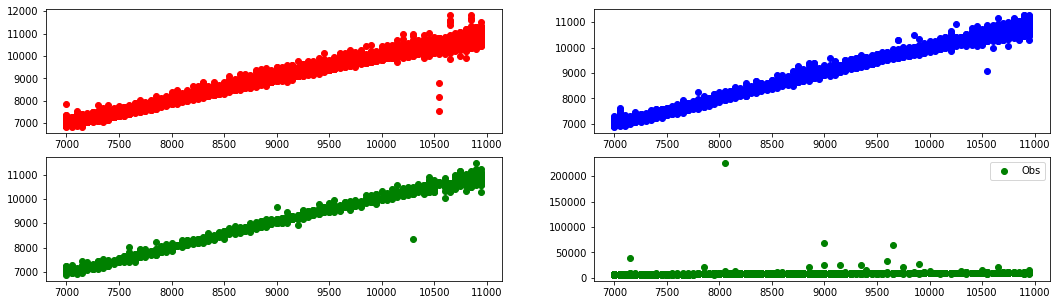

In [31]:
# PLots in case we have one label only

Xobs=rho
Xobs = preprocessing.StandardScaler().fit(Xobs).transform(Xobs.astype(float))
yobs=model.predict(Xobs)

Xobs2=rho2
Xobs2 = preprocessing.StandardScaler().fit(Xobs2).transform(Xobs2.astype(float))
yobs2=model.predict(Xobs2)

y_hat = model.predict(X_train)
y_pred = model.predict(X_test)



fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 5))

ax[0,0].plot(y_train,y_hat[:,0],'ro', label='Train')
ax[0,1].plot(y_test,y_pred[:,0],'bo', label='Val')
ax[1,0].plot(temp,yobs[:,0],'go', label='Test')
ax[1,1].plot(temp2,yobs2[:,0],'go', label='Obs')
plt.legend()
plt.plot()





evaluation Training 750.2188491268644
evaluation Validation 750.5725106723625
evaluation Observation 718.8673503012675
evaluation Observation2 4468.793563583959


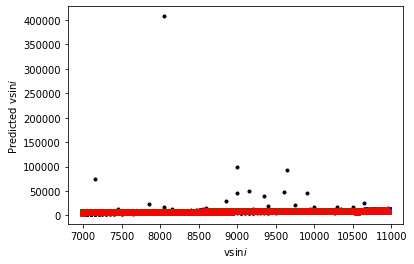

In [27]:
plt.plot(temp2,yobs2[:,0],'k.', label='Observation')
plt.plot(y_test,y_pred[:,0],'bs', label='Validation')
plt.plot(temp,yobs[:,0],'g>', label='Test')
plt.plot(y_train,y_hat[:,0],'r^', label='Training')

plt.xlabel("T$_{eff}$")
plt.ylabel("Predicted T$_{eff}$")

eval_train=(1/len(y_train))*((abs(y_hat[:,0]-y_train)**2).sum())
eval_test=(1/len(y_test))*((abs(y_pred[:,0]-y_test)**2).sum())
eval_obs=(1/len(temp))*((abs(yobs[:,0]-temp)**2).sum())
eval_obs2=(1/len(temp2))*((abs(yobs2[:,0]-temp2)**2).sum())

eval_train=eval_train**0.5
eval_test=eval_test**0.5
eval_obs=eval_obs**0.5
eval_obs2=eval_obs2**0.5

print("evaluation Training", eval_train)
print("evaluation Validation", eval_test)
print("evaluation Observation", eval_obs)
print("evaluation Observation2", eval_obs2)



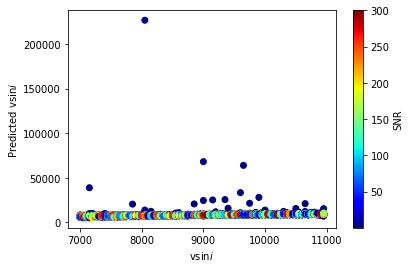

2333.3061915679186


In [32]:
### Evaluation S/N

sn2=[]
for i in np.arange(len(lst2)):
    sn2.append(float(lst2[i][92:-4]))
temp2=np.array(temp2)
yobs2=np.array(yobs2)
sn2=np.array(sn2)
vsini2=np.array(vsini2)
grav2=np.array(grav2)
#_______________________
mask=(sn2>0)&(vsini2<300)&(temp2>=7000)&(grav2>=2.0)
#-------------------------

vin=temp2[mask]
ys=yobs2[mask][:,0]
c2=sn2[mask]
plt.colorbar(plt.scatter(vin, ys, c=c2, cmap=plt.cm.jet)).set_label('SNR')

#.legend('Observations with SNR>10')

eval_obs2=0
for i in np.arange(len(vin)):
    eval_obs2=eval_obs2+abs((ys[i]-vin[i])**2)
eval_obs2=eval_obs2/len(vin)
eval_obs2=eval_obs2**0.5

plt.xlabel("T$_{eff}$")
plt.ylabel("Predicted T$_{eff}$")



plt.show()
print(eval_obs2)



In [ ]:

def get_model_summary(model):
    stream = io.StringIO()
    model.summary(print_fn=lambda x: stream.write(x + '\n'))
    summary_string = stream.getvalue()
    stream.close()
    return summary_string

model_summary_string = get_model_summary(model)


eval_train=(1/len(y_train))*((abs(y_hat[:,0]-y_train)**2).sum())
eval_test=(1/len(y_test))*((abs(y_pred[:,0]-y_test)**2).sum())
eval_obs=(1/len(temp))*((abs(yobs[:,0]-temp)**2).sum())
eval_obs2=(1/len(temp2))*((abs(yobs2[:,0]-temp2)**2).sum())


print("evaluation Training", eval_train**0.5)
print("evaluation Validation", eval_test**0.5)
print("evaluation Observation", eval_obs**0.5)
print("evaluation Observation2", eval_obs2**0.5)


o=open("Evaluation_CNN","a")
o.write("\n"+str(model_summary_string)+"\n")
o.write("Evaluation Training"  +"\t"+str(eval_train**0.5)+"\n" \
        +"Evaluation Validation"  +"\t"+str(eval_test**0.5)+"\n" \
        +"Evaluation Observation"  +"\t"+str(eval_obs**0.5)+"\n" \
        +"Evaluation Observation2"  +"\t"+str(eval_obs2**0.5)+"\n") 
o.close()

### $\log g$

In [43]:


y=np.zeros((len(p)))

for i in np.arange(len(p)):
#    y[i]=teff[i]
    y[i]=logg[i]
#    y[i]=vrot[i]
#    y[i]=metal[i]
out_dim=y.shape[0]        
print("Targets have the dimension of ", y.shape)   
X=p
print("The features have the dimension of", X.shape)
#y=np.array(teff)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
in_dim=X.shape[1]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=3,shuffle=True)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Targets have the dimension of  (22011,)
The features have the dimension of (22011, 50)
Train set: (17608, 50) (17608,)
Test set: (4403, 50) (4403,)


In [44]:
#early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001,patience=10, verbose=1, mode='auto') 
#early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, mode='min') 

model = Sequential()
model.add(Dense(2048, activation='relu', input_dim=in_dim))
model.add(Dropout(0.3))
model.add(Dense(1024, activation='relu', input_dim=in_dim))
model.add(Dropout(0.3))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='relu'))
model.add(Dropout(0.3))
#model.add(layers.Dense(1, activation='softmax'))
model.add(Dense(out_dim,activation='linear'))
model.compile(loss="mean_squared_error", optimizer="adam",metrics=["accuracy"])


#history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=50, batch_size=20)
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=500, batch_size=64)

duration = 0.5  # seconds
freq = 440  # Hz
os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))    



Epoch 1/500
276/276 [==============================] - 7s 26ms/step - loss: 1.5076 - accuracy: 8.5189e-04 - val_loss: 0.2132 - val_accuracy: 0.0000e+00
Epoch 2/500
276/276 [==============================] - 7s 26ms/step - loss: 0.8142 - accuracy: 0.0000e+00 - val_loss: 0.3237 - val_accuracy: 0.0000e+00
Epoch 3/500
276/276 [==============================] - 7s 26ms/step - loss: 0.7071 - accuracy: 0.0000e+00 - val_loss: 0.1976 - val_accuracy: 0.0000e+00
Epoch 4/500
276/276 [==============================] - 8s 27ms/step - loss: 0.7025 - accuracy: 1.1358e-04 - val_loss: 0.0605 - val_accuracy: 0.0000e+00
Epoch 5/500
276/276 [==============================] - 7s 27ms/step - loss: 0.6040 - accuracy: 0.0000e+00 - val_loss: 0.2810 - val_accuracy: 0.0000e+00
Epoch 6/500
276/276 [==============================] - 8s 28ms/step - loss: 0.5675 - accuracy: 5.6792e-05 - val_loss: 0.1518 - val_accuracy: 0.0000e+00
Epoch 7/500
276/276 [==============================] - 8s 28ms/step - loss: 0.5092 - acc

276/276 [==============================] - 7s 24ms/step - loss: 0.0985 - accuracy: 0.0000e+00 - val_loss: 0.0269 - val_accuracy: 0.0018
Epoch 55/500
276/276 [==============================] - 6s 22ms/step - loss: 0.0997 - accuracy: 5.6792e-04 - val_loss: 0.0240 - val_accuracy: 0.0000e+00
Epoch 56/500
276/276 [==============================] - 7s 24ms/step - loss: 0.0994 - accuracy: 3.9755e-04 - val_loss: 0.0280 - val_accuracy: 0.0000e+00
Epoch 57/500
276/276 [==============================] - 8s 29ms/step - loss: 0.1008 - accuracy: 1.7038e-04 - val_loss: 0.0361 - val_accuracy: 0.0000e+00
Epoch 58/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0983 - accuracy: 9.6547e-04 - val_loss: 0.0304 - val_accuracy: 0.0000e+00
Epoch 59/500
276/276 [==============================] - 6s 23ms/step - loss: 0.0987 - accuracy: 0.0015 - val_loss: 0.0290 - val_accuracy: 0.0036
Epoch 60/500
276/276 [==============================] - 6s 22ms/step - loss: 0.0984 - accuracy: 0.0010 - va

276/276 [==============================] - 6s 23ms/step - loss: 0.0982 - accuracy: 2.2717e-04 - val_loss: 0.0351 - val_accuracy: 0.0011
Epoch 109/500
276/276 [==============================] - 8s 28ms/step - loss: 0.0981 - accuracy: 5.6792e-04 - val_loss: 0.0272 - val_accuracy: 9.0847e-04
Epoch 110/500
276/276 [==============================] - 9s 32ms/step - loss: 0.0961 - accuracy: 2.8396e-04 - val_loss: 0.0310 - val_accuracy: 4.5424e-04
Epoch 111/500
276/276 [==============================] - 8s 31ms/step - loss: 0.1008 - accuracy: 5.6792e-04 - val_loss: 0.0260 - val_accuracy: 2.2712e-04
Epoch 112/500
276/276 [==============================] - 7s 25ms/step - loss: 0.0956 - accuracy: 2.8396e-04 - val_loss: 0.0266 - val_accuracy: 2.2712e-04
Epoch 113/500
276/276 [==============================] - 7s 25ms/step - loss: 0.0965 - accuracy: 2.8396e-04 - val_loss: 0.0285 - val_accuracy: 2.2712e-04
Epoch 114/500
276/276 [==============================] - 6s 23ms/step - loss: 0.0938 - accurac

276/276 [==============================] - 6s 22ms/step - loss: 0.0975 - accuracy: 4.5434e-04 - val_loss: 0.0243 - val_accuracy: 2.2712e-04
Epoch 162/500
276/276 [==============================] - 6s 22ms/step - loss: 0.0970 - accuracy: 2.2717e-04 - val_loss: 0.0320 - val_accuracy: 0.0000e+00
Epoch 163/500
276/276 [==============================] - 6s 23ms/step - loss: 0.0971 - accuracy: 5.6792e-05 - val_loss: 0.0377 - val_accuracy: 0.0000e+00
Epoch 164/500
276/276 [==============================] - 7s 24ms/step - loss: 0.0953 - accuracy: 1.7038e-04 - val_loss: 0.0280 - val_accuracy: 0.0000e+00
Epoch 165/500
276/276 [==============================] - 7s 24ms/step - loss: 0.0985 - accuracy: 1.7038e-04 - val_loss: 0.0286 - val_accuracy: 2.2712e-04
Epoch 166/500
276/276 [==============================] - 7s 25ms/step - loss: 0.0977 - accuracy: 5.1113e-04 - val_loss: 0.0280 - val_accuracy: 9.0847e-04
Epoch 167/500
276/276 [==============================] - 7s 27ms/step - loss: 0.0972 - acc

276/276 [==============================] - 7s 26ms/step - loss: 0.0959 - accuracy: 5.1113e-04 - val_loss: 0.0262 - val_accuracy: 6.8135e-04
Epoch 215/500
276/276 [==============================] - 7s 25ms/step - loss: 0.0981 - accuracy: 0.0026 - val_loss: 0.0330 - val_accuracy: 2.2712e-04
Epoch 216/500
276/276 [==============================] - 7s 25ms/step - loss: 0.0956 - accuracy: 3.9755e-04 - val_loss: 0.0290 - val_accuracy: 2.2712e-04
Epoch 217/500
276/276 [==============================] - 7s 25ms/step - loss: 0.0975 - accuracy: 5.6792e-05 - val_loss: 0.0263 - val_accuracy: 2.2712e-04
Epoch 218/500
276/276 [==============================] - 7s 25ms/step - loss: 0.0983 - accuracy: 0.0011 - val_loss: 0.0259 - val_accuracy: 4.5424e-04
Epoch 219/500
276/276 [==============================] - 7s 24ms/step - loss: 0.0987 - accuracy: 4.5434e-04 - val_loss: 0.0305 - val_accuracy: 6.8135e-04
Epoch 220/500
276/276 [==============================] - 7s 25ms/step - loss: 0.0959 - accuracy: 4

Epoch 268/500
276/276 [==============================] - 7s 24ms/step - loss: 0.0983 - accuracy: 2.2717e-04 - val_loss: 0.0239 - val_accuracy: 6.8135e-04
Epoch 269/500
276/276 [==============================] - 7s 24ms/step - loss: 0.0946 - accuracy: 7.3830e-04 - val_loss: 0.0300 - val_accuracy: 0.0000e+00
Epoch 270/500
276/276 [==============================] - 7s 25ms/step - loss: 0.0959 - accuracy: 3.4075e-04 - val_loss: 0.0272 - val_accuracy: 6.8135e-04
Epoch 271/500
276/276 [==============================] - 7s 25ms/step - loss: 0.0967 - accuracy: 2.8396e-04 - val_loss: 0.0245 - val_accuracy: 2.2712e-04
Epoch 272/500
276/276 [==============================] - 7s 25ms/step - loss: 0.0967 - accuracy: 4.5434e-04 - val_loss: 0.0442 - val_accuracy: 4.5424e-04
Epoch 273/500
276/276 [==============================] - 7s 25ms/step - loss: 0.0956 - accuracy: 5.1113e-04 - val_loss: 0.0353 - val_accuracy: 6.8135e-04
Epoch 274/500
276/276 [==============================] - 7s 25ms/step - loss

276/276 [==============================] - 6s 22ms/step - loss: 0.0980 - accuracy: 2.2717e-04 - val_loss: 0.0292 - val_accuracy: 4.5424e-04
Epoch 322/500
276/276 [==============================] - 6s 22ms/step - loss: 0.0951 - accuracy: 5.6792e-04 - val_loss: 0.0298 - val_accuracy: 0.0000e+00
Epoch 323/500
276/276 [==============================] - 6s 22ms/step - loss: 0.0970 - accuracy: 5.1113e-04 - val_loss: 0.0299 - val_accuracy: 2.2712e-04
Epoch 324/500
276/276 [==============================] - 6s 22ms/step - loss: 0.0968 - accuracy: 3.4075e-04 - val_loss: 0.0319 - val_accuracy: 0.0000e+00
Epoch 325/500
276/276 [==============================] - 6s 22ms/step - loss: 0.0956 - accuracy: 6.8151e-04 - val_loss: 0.0276 - val_accuracy: 2.2712e-04
Epoch 326/500
276/276 [==============================] - 6s 22ms/step - loss: 0.0978 - accuracy: 6.2472e-04 - val_loss: 0.0296 - val_accuracy: 0.0000e+00
Epoch 327/500
276/276 [==============================] - 6s 22ms/step - loss: 0.0979 - acc

276/276 [==============================] - 6s 22ms/step - loss: 0.0989 - accuracy: 0.0016 - val_loss: 0.0317 - val_accuracy: 0.0104
Epoch 375/500
276/276 [==============================] - 6s 22ms/step - loss: 0.0988 - accuracy: 0.0022 - val_loss: 0.0243 - val_accuracy: 4.5424e-04
Epoch 376/500
276/276 [==============================] - 6s 22ms/step - loss: 0.0984 - accuracy: 1.7038e-04 - val_loss: 0.0261 - val_accuracy: 2.2712e-04
Epoch 377/500
276/276 [==============================] - 6s 23ms/step - loss: 0.0976 - accuracy: 2.8396e-04 - val_loss: 0.0309 - val_accuracy: 0.0000e+00
Epoch 378/500
276/276 [==============================] - 6s 23ms/step - loss: 0.0974 - accuracy: 4.5434e-04 - val_loss: 0.0278 - val_accuracy: 2.2712e-04
Epoch 379/500
276/276 [==============================] - 6s 22ms/step - loss: 0.0962 - accuracy: 0.0010 - val_loss: 0.0337 - val_accuracy: 2.2712e-04
Epoch 380/500
276/276 [==============================] - 6s 22ms/step - loss: 0.0975 - accuracy: 0.0055 - 

276/276 [==============================] - 6s 22ms/step - loss: 0.0944 - accuracy: 9.0868e-04 - val_loss: 0.0272 - val_accuracy: 9.0847e-04
Epoch 428/500
276/276 [==============================] - 6s 22ms/step - loss: 0.0968 - accuracy: 5.1113e-04 - val_loss: 0.0320 - val_accuracy: 0.0011
Epoch 429/500
276/276 [==============================] - 6s 22ms/step - loss: 0.0968 - accuracy: 3.9755e-04 - val_loss: 0.0314 - val_accuracy: 0.0000e+00
Epoch 430/500
276/276 [==============================] - 6s 22ms/step - loss: 0.0941 - accuracy: 5.1113e-04 - val_loss: 0.0306 - val_accuracy: 2.2712e-04
Epoch 431/500
276/276 [==============================] - 6s 22ms/step - loss: 0.0972 - accuracy: 3.9755e-04 - val_loss: 0.0344 - val_accuracy: 0.0000e+00
Epoch 432/500
276/276 [==============================] - 6s 22ms/step - loss: 0.0972 - accuracy: 3.9755e-04 - val_loss: 0.0283 - val_accuracy: 0.0018
Epoch 433/500
276/276 [==============================] - 6s 22ms/step - loss: 0.0969 - accuracy: 0

276/276 [==============================] - 6s 22ms/step - loss: 0.0992 - accuracy: 8.5189e-04 - val_loss: 0.0298 - val_accuracy: 4.5424e-04
Epoch 481/500
276/276 [==============================] - 6s 22ms/step - loss: 0.0970 - accuracy: 4.5434e-04 - val_loss: 0.0280 - val_accuracy: 6.8135e-04
Epoch 482/500
276/276 [==============================] - 6s 22ms/step - loss: 0.0966 - accuracy: 0.0106 - val_loss: 0.0344 - val_accuracy: 2.2712e-04
Epoch 483/500
276/276 [==============================] - 6s 22ms/step - loss: 0.1002 - accuracy: 8.5189e-04 - val_loss: 0.0353 - val_accuracy: 0.0000e+00
Epoch 484/500
276/276 [==============================] - 6s 22ms/step - loss: 0.0977 - accuracy: 6.8151e-04 - val_loss: 0.0303 - val_accuracy: 0.0000e+00
Epoch 485/500
276/276 [==============================] - 6s 22ms/step - loss: 0.0968 - accuracy: 2.2717e-04 - val_loss: 0.0369 - val_accuracy: 4.5424e-04
Epoch 486/500
276/276 [==============================] - 6s 22ms/step - loss: 0.0968 - accurac

0

In [45]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Min accuracy:', np.min(history.history['accuracy']))
print('Min loss:', np.min(history.history['val_loss']))

model.summary()
#plot_model(model)

Test loss: 0.02863958477973938
Test accuracy: 0.0
Min accuracy: 0.0
Min loss: 0.006279904395341873
Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_22 (Dense)             (None, 2048)              104448    
_________________________________________________________________
dropout_12 (Dropout)         (None, 2048)              0         
_________________________________________________________________
dense_23 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_13 (Dropout)         (None, 1024)              0         
_________________________________________________________________
dense_24 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_14 (Dropout)         (None, 512)               0         
_____________________

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

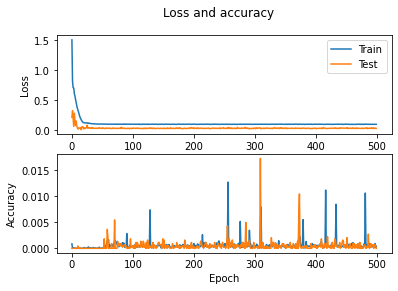

In [46]:
fig, ax = plt.subplots(2)
fig.suptitle('Loss and accuracy')


ax[0].plot(history.history['loss']) 
ax[0].plot(history.history['val_loss']) 
ax[0].set(xlabel='Epoch', ylabel='Loss') 
ax[0].legend(['Train', 'Test'], loc='upper right') 


ax[1].plot(history.history['accuracy'], label='accuracy')
ax[1].plot(history.history['val_accuracy'], label = 'val_accuracy')
ax[1].set(xlabel='Epoch', ylabel='Accuracy') 




[]

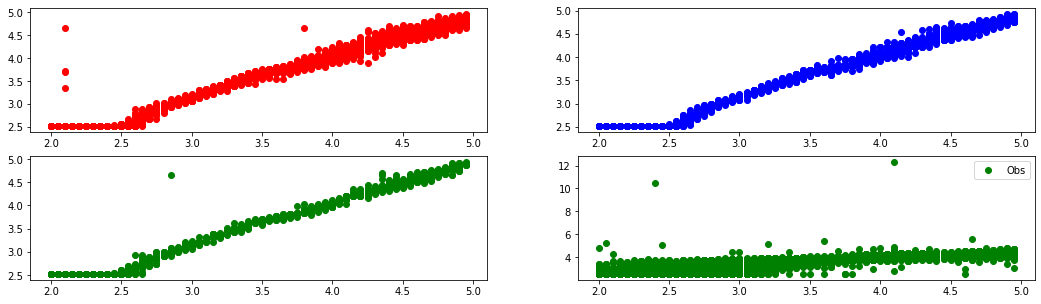

In [47]:
# PLots in case we have one label only

Xobs=rho
Xobs = preprocessing.StandardScaler().fit(Xobs).transform(Xobs.astype(float))
yobs=model.predict(Xobs)

Xobs2=rho2
Xobs2 = preprocessing.StandardScaler().fit(Xobs2).transform(Xobs2.astype(float))
yobs2=model.predict(Xobs2)

y_hat = model.predict(X_train)
y_pred = model.predict(X_test)



fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 5))

ax[0,0].plot(y_train,y_hat[:,0],'ro', label='Train')
ax[0,1].plot(y_test,y_pred[:,0],'bo', label='Val')
ax[1,0].plot(grav,yobs[:,0],'go', label='Test')
ax[1,1].plot(grav2,yobs2[:,0],'go', label='Obs')
plt.legend()
plt.plot()





evaluation Training 0.16880938456776448
evaluation Validation 0.1692323046217241
evaluation Observation 0.18714672205374872
evaluation Observation2 0.40957245009140797


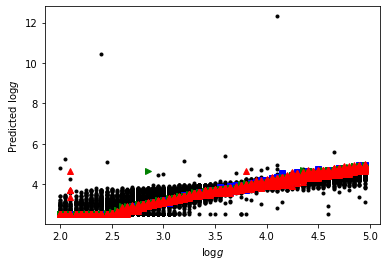

In [49]:
plt.plot(grav2,yobs2[:,0],'k.', label='Observation')
plt.plot(y_test,y_pred[:,0],'bs', label='Validation')
plt.plot(grav,yobs[:,0],'g>', label='Test')
plt.plot(y_train,y_hat[:,0],'r^', label='Training')

plt.xlabel("$\log g$")
plt.ylabel("Predicted $\log g$")

eval_train=(1/len(y_train))*((abs(y_hat[:,0]-y_train)**2).sum())
eval_test=(1/len(y_test))*((abs(y_pred[:,0]-y_test)**2).sum())
eval_obs=(1/len(grav))*((abs(yobs[:,0]-grav)**2).sum())
eval_obs2=(1/len(grav2))*((abs(yobs2[:,0]-grav2)**2).sum())

eval_train=eval_train**0.5
eval_test=eval_test**0.5
eval_obs=eval_obs**0.5
eval_obs2=eval_obs2**0.5

print("evaluation Training", eval_train)
print("evaluation Validation", eval_test)
print("evaluation Observation", eval_obs)
print("evaluation Observation2", eval_obs2)



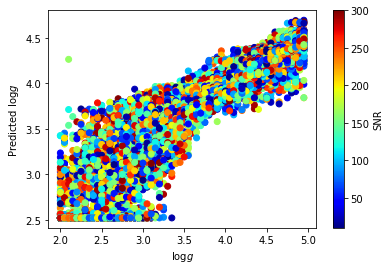

0.38779400477325404


In [51]:
### Evaluation S/N

sn2=[]
for i in np.arange(len(lst2)):
    sn2.append(float(lst2[i][92:-4]))
temp2=np.array(temp2)
yobs2=np.array(yobs2)
sn2=np.array(sn2)
vsini2=np.array(vsini2)
grav2=np.array(grav2)
#_______________________
mask=(sn2>10)&(vsini2<300)&(temp2>=7000)&(grav2>=2.0)
#-------------------------

vin=grav2[mask]
ys=yobs2[mask][:,0]
c2=sn2[mask]
plt.colorbar(plt.scatter(vin, ys, c=c2, cmap=plt.cm.jet)).set_label('SNR')

#.legend('Observations with SNR>10')

eval_obs2=0
for i in np.arange(len(vin)):
    eval_obs2=eval_obs2+abs((ys[i]-vin[i])**2)
eval_obs2=eval_obs2/len(vin)
eval_obs2=eval_obs2**0.5

plt.xlabel("$\log g$")
plt.ylabel("Predicted $\log g$")



plt.show()
print(eval_obs2)



### [$\dfrac{X}{H}$]

In [36]:


y=np.zeros((len(p)))

for i in np.arange(len(p)):
#    y[i]=teff[i]
#    y[i]=logg[i]
#    y[i]=vrot[i]
    y[i]=metal[i]
out_dim=y.shape[0]        
print("Targets have the dimension of ", y.shape)   
X=p
print("The features have the dimension of", X.shape)
#y=np.array(teff)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
in_dim=X.shape[1]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=3,shuffle=True)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Targets have the dimension of  (22011,)
The features have the dimension of (22011, 50)
Train set: (17608, 50) (17608,)
Test set: (4403, 50) (4403,)


In [37]:
#early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001,patience=10, verbose=1, mode='auto') 
#early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, mode='min') 

model = Sequential()
model.add(layers.Dense(2048, activation='relu', input_dim=in_dim))
model.add(Dropout(0.3))
model.add(layers.Dense(1024, activation='relu', input_dim=in_dim))
model.add(Dropout(0.3))
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(layers.Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(layers.Dense(10, activation='relu'))
#model.add(layers.Dense(1, activation='softmax'))
model.add(Dense(out_dim,activation='linear'))
model.compile(loss="mean_squared_error", optimizer="adam",metrics=["accuracy"])


#history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=50, batch_size=20)
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=500, batch_size=64)

duration = 0.5  # seconds
freq = 440  # Hz
os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))    



Epoch 1/500
276/276 [==============================] - 7s 27ms/step - loss: 0.0971 - accuracy: 0.0000e+00 - val_loss: 0.0262 - val_accuracy: 0.0000e+00
Epoch 2/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0239 - accuracy: 0.0000e+00 - val_loss: 0.0253 - val_accuracy: 0.0000e+00
Epoch 3/500
276/276 [==============================] - 7s 25ms/step - loss: 0.0229 - accuracy: 0.0000e+00 - val_loss: 0.0067 - val_accuracy: 0.0000e+00
Epoch 4/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0210 - accuracy: 0.0000e+00 - val_loss: 0.0192 - val_accuracy: 0.0000e+00
Epoch 5/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0169 - accuracy: 0.0000e+00 - val_loss: 0.0410 - val_accuracy: 0.0000e+00
Epoch 6/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0152 - accuracy: 0.0000e+00 - val_loss: 0.0502 - val_accuracy: 0.0000e+00
Epoch 7/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0132 - acc

276/276 [==============================] - 7s 26ms/step - loss: 0.0041 - accuracy: 0.0000e+00 - val_loss: 0.0145 - val_accuracy: 0.0000e+00
Epoch 55/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0038 - accuracy: 5.6792e-05 - val_loss: 0.0161 - val_accuracy: 0.0000e+00
Epoch 56/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0045 - accuracy: 5.6792e-05 - val_loss: 0.0206 - val_accuracy: 0.0000e+00
Epoch 57/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0045 - accuracy: 5.6792e-05 - val_loss: 0.0166 - val_accuracy: 0.0000e+00
Epoch 58/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0037 - accuracy: 1.1358e-04 - val_loss: 0.0186 - val_accuracy: 0.0000e+00
Epoch 59/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0035 - accuracy: 5.6792e-05 - val_loss: 0.0184 - val_accuracy: 0.0000e+00
Epoch 60/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0033 - accuracy:

276/276 [==============================] - 7s 26ms/step - loss: 0.0027 - accuracy: 0.0000e+00 - val_loss: 0.0088 - val_accuracy: 0.0000e+00
Epoch 108/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0026 - accuracy: 0.0000e+00 - val_loss: 0.0062 - val_accuracy: 0.0000e+00
Epoch 109/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0025 - accuracy: 0.0000e+00 - val_loss: 0.0085 - val_accuracy: 0.0000e+00
Epoch 110/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0026 - accuracy: 0.0000e+00 - val_loss: 0.0089 - val_accuracy: 0.0000e+00
Epoch 111/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0026 - accuracy: 5.6792e-05 - val_loss: 0.0066 - val_accuracy: 0.0000e+00
Epoch 112/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0026 - accuracy: 5.6792e-05 - val_loss: 0.0064 - val_accuracy: 2.2712e-04
Epoch 113/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0027 - acc

276/276 [==============================] - 7s 26ms/step - loss: 0.0033 - accuracy: 0.0000e+00 - val_loss: 0.0092 - val_accuracy: 0.0000e+00
Epoch 161/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0031 - accuracy: 1.1358e-04 - val_loss: 0.0096 - val_accuracy: 0.0000e+00
Epoch 162/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0031 - accuracy: 5.6792e-05 - val_loss: 0.0113 - val_accuracy: 0.0000e+00
Epoch 163/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0025 - accuracy: 0.0000e+00 - val_loss: 0.0111 - val_accuracy: 0.0000e+00
Epoch 164/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0029 - accuracy: 0.0000e+00 - val_loss: 0.0114 - val_accuracy: 0.0000e+00
Epoch 165/500
276/276 [==============================] - 7s 27ms/step - loss: 0.0028 - accuracy: 0.0000e+00 - val_loss: 0.0087 - val_accuracy: 0.0000e+00
Epoch 166/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0027 - acc

276/276 [==============================] - 7s 26ms/step - loss: 0.0027 - accuracy: 5.6792e-05 - val_loss: 0.0130 - val_accuracy: 0.0000e+00
Epoch 214/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0026 - accuracy: 1.1358e-04 - val_loss: 0.0097 - val_accuracy: 0.0000e+00
Epoch 215/500
276/276 [==============================] - 7s 27ms/step - loss: 0.0024 - accuracy: 5.6792e-05 - val_loss: 0.0119 - val_accuracy: 0.0000e+00
Epoch 216/500
276/276 [==============================] - 7s 27ms/step - loss: 0.0026 - accuracy: 1.7038e-04 - val_loss: 0.0105 - val_accuracy: 0.0000e+00
Epoch 217/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0025 - accuracy: 5.6792e-05 - val_loss: 0.0113 - val_accuracy: 0.0000e+00
Epoch 218/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0029 - accuracy: 0.0000e+00 - val_loss: 0.0140 - val_accuracy: 0.0000e+00
Epoch 219/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0025 - acc

276/276 [==============================] - 7s 27ms/step - loss: 0.0026 - accuracy: 0.0000e+00 - val_loss: 0.0122 - val_accuracy: 0.0000e+00
Epoch 267/500
276/276 [==============================] - 7s 25ms/step - loss: 0.0029 - accuracy: 0.0000e+00 - val_loss: 0.0148 - val_accuracy: 0.0000e+00
Epoch 268/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0027 - accuracy: 5.6792e-05 - val_loss: 0.0152 - val_accuracy: 0.0000e+00
Epoch 269/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0029 - accuracy: 0.0000e+00 - val_loss: 0.0111 - val_accuracy: 0.0000e+00
Epoch 270/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0025 - accuracy: 5.6792e-05 - val_loss: 0.0150 - val_accuracy: 0.0000e+00
Epoch 271/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0024 - accuracy: 5.6792e-05 - val_loss: 0.0151 - val_accuracy: 2.2712e-04
Epoch 272/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0026 - acc

276/276 [==============================] - 7s 26ms/step - loss: 0.0030 - accuracy: 5.6792e-05 - val_loss: 0.0156 - val_accuracy: 0.0000e+00
Epoch 320/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0026 - accuracy: 0.0000e+00 - val_loss: 0.0150 - val_accuracy: 0.0000e+00
Epoch 321/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0025 - accuracy: 0.0000e+00 - val_loss: 0.0148 - val_accuracy: 0.0000e+00
Epoch 322/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0027 - accuracy: 5.6792e-05 - val_loss: 0.0142 - val_accuracy: 0.0000e+00
Epoch 323/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0028 - accuracy: 0.0000e+00 - val_loss: 0.0138 - val_accuracy: 0.0000e+00
Epoch 324/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0028 - accuracy: 0.0000e+00 - val_loss: 0.0122 - val_accuracy: 0.0000e+00
Epoch 325/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0028 - acc

276/276 [==============================] - 7s 26ms/step - loss: 0.0028 - accuracy: 1.1358e-04 - val_loss: 0.0113 - val_accuracy: 0.0000e+00
Epoch 373/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0032 - accuracy: 0.0000e+00 - val_loss: 0.0144 - val_accuracy: 0.0000e+00
Epoch 374/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0028 - accuracy: 0.0000e+00 - val_loss: 0.0143 - val_accuracy: 0.0000e+00
Epoch 375/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0028 - accuracy: 0.0000e+00 - val_loss: 0.0126 - val_accuracy: 0.0000e+00
Epoch 376/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0028 - accuracy: 5.6792e-05 - val_loss: 0.0128 - val_accuracy: 0.0000e+00
Epoch 377/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0027 - accuracy: 0.0000e+00 - val_loss: 0.0140 - val_accuracy: 0.0000e+00
Epoch 378/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0034 - acc

276/276 [==============================] - 7s 26ms/step - loss: 0.0029 - accuracy: 0.0000e+00 - val_loss: 0.0156 - val_accuracy: 0.0000e+00
Epoch 426/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0030 - accuracy: 5.6792e-05 - val_loss: 0.0129 - val_accuracy: 0.0000e+00
Epoch 427/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0027 - accuracy: 1.1358e-04 - val_loss: 0.0121 - val_accuracy: 0.0000e+00
Epoch 428/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0030 - accuracy: 5.6792e-05 - val_loss: 0.0133 - val_accuracy: 0.0000e+00
Epoch 429/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0031 - accuracy: 5.6792e-05 - val_loss: 0.0123 - val_accuracy: 0.0000e+00
Epoch 430/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0030 - accuracy: 1.7038e-04 - val_loss: 0.0145 - val_accuracy: 0.0000e+00
Epoch 431/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0031 - acc

276/276 [==============================] - 7s 26ms/step - loss: 0.0033 - accuracy: 5.6792e-05 - val_loss: 0.0124 - val_accuracy: 0.0000e+00
Epoch 479/500
276/276 [==============================] - 7s 25ms/step - loss: 0.0036 - accuracy: 0.0000e+00 - val_loss: 0.0138 - val_accuracy: 0.0000e+00
Epoch 480/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0035 - accuracy: 0.0000e+00 - val_loss: 0.0127 - val_accuracy: 0.0000e+00
Epoch 481/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0037 - accuracy: 0.0000e+00 - val_loss: 0.0135 - val_accuracy: 0.0000e+00
Epoch 482/500
276/276 [==============================] - 7s 27ms/step - loss: 0.0036 - accuracy: 0.0000e+00 - val_loss: 0.0115 - val_accuracy: 0.0000e+00
Epoch 483/500
276/276 [==============================] - 7s 27ms/step - loss: 0.0029 - accuracy: 5.6792e-05 - val_loss: 0.0153 - val_accuracy: 0.0000e+00
Epoch 484/500
276/276 [==============================] - 7s 26ms/step - loss: 0.0034 - acc

0

In [38]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Min accuracy:', np.min(history.history['accuracy']))
print('Min loss:', np.min(history.history['val_loss']))

model.summary()
#plot_model(model)

Test loss: 0.015667477622628212
Test accuracy: 0.0
Min accuracy: 0.0
Min loss: 0.0058883302845060825
Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 2048)              104448    
_________________________________________________________________
dropout_8 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_17 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_9 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_18 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_10 (Dropout)         (None, 512)               0         
___________________

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

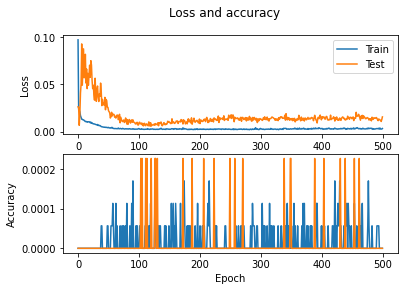

In [39]:
fig, ax = plt.subplots(2)
fig.suptitle('Loss and accuracy')


ax[0].plot(history.history['loss']) 
ax[0].plot(history.history['val_loss']) 
ax[0].set(xlabel='Epoch', ylabel='Loss') 
ax[0].legend(['Train', 'Test'], loc='upper right') 


ax[1].plot(history.history['accuracy'], label='accuracy')
ax[1].plot(history.history['val_accuracy'], label = 'val_accuracy')
ax[1].set(xlabel='Epoch', ylabel='Accuracy') 




[]

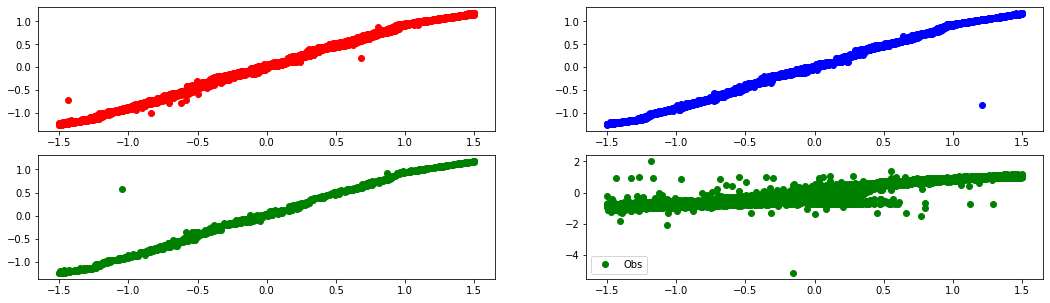

In [40]:
# PLots in case we have one label only

Xobs=rho
Xobs = preprocessing.StandardScaler().fit(Xobs).transform(Xobs.astype(float))
yobs=model.predict(Xobs)

Xobs2=rho2
Xobs2 = preprocessing.StandardScaler().fit(Xobs2).transform(Xobs2.astype(float))
yobs2=model.predict(Xobs2)

y_hat = model.predict(X_train)
y_pred = model.predict(X_test)



fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 5))

ax[0,0].plot(y_train,y_hat[:,0],'ro', label='Train')
ax[0,1].plot(y_test,y_pred[:,0],'bo', label='Val')
ax[1,0].plot(meta,yobs[:,0],'go', label='Test')
ax[1,1].plot(meta2,yobs2[:,0],'go', label='Obs')
plt.legend()
plt.plot()





evaluation Training 0.11988858079248205
evaluation Validation 0.12516979687072294
evaluation Observation 0.1307853496567225
evaluation Observation2 0.29129250618562946


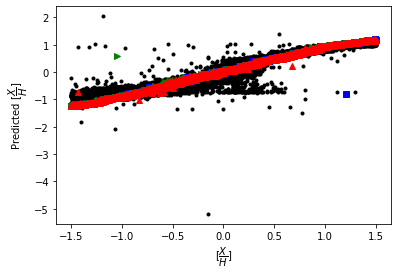

In [41]:
plt.plot(meta2,yobs2[:,0],'k.', label='Observation')
plt.plot(y_test,y_pred[:,0],'bs', label='Validation')
plt.plot(meta,yobs[:,0],'g>', label='Test')
plt.plot(y_train,y_hat[:,0],'r^', label='Training')

plt.xlabel("[$\dfrac{X}{H}$]")
plt.ylabel("Predicted [$\dfrac{X}{H}$]")

eval_train=(1/len(y_train))*((abs(y_hat[:,0]-y_train)**2).sum())
eval_test=(1/len(y_test))*((abs(y_pred[:,0]-y_test)**2).sum())
eval_obs=(1/len(meta))*((abs(yobs[:,0]-meta)**2).sum())
eval_obs2=(1/len(meta2))*((abs(yobs2[:,0]-meta2)**2).sum())

eval_train=eval_train**0.5
eval_test=eval_test**0.5
eval_obs=eval_obs**0.5
eval_obs2=eval_obs2**0.5

print("evaluation Training", eval_train)
print("evaluation Validation", eval_test)
print("evaluation Observation", eval_obs)
print("evaluation Observation2", eval_obs2)



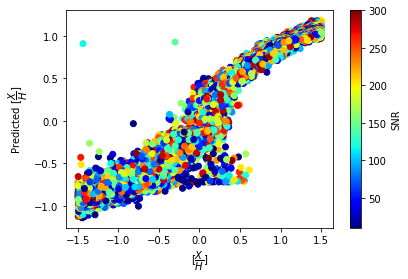

0.27053749663679955


In [42]:
### Evaluation S/N

sn2=[]
for i in np.arange(len(lst2)):
    sn2.append(float(lst2[i][92:-4]))
temp2=np.array(temp2)
yobs2=np.array(yobs2)
sn2=np.array(sn2)
vsini2=np.array(vsini2)
grav2=np.array(grav2)
meta2=np.array(meta2)
#_______________________
mask=(sn2>10)&(vsini2<300)&(temp2>=7000)&(grav2>=2.0)&(meta2>=-1.5)
#-------------------------

vin=meta2[mask]
ys=yobs2[mask][:,0]
c2=sn2[mask]
plt.colorbar(plt.scatter(vin, ys, c=c2, cmap=plt.cm.jet)).set_label('SNR')

#.legend('Observations with SNR>10')

eval_obs2=0
for i in np.arange(len(vin)):
    eval_obs2=eval_obs2+abs((ys[i]-vin[i])**2)
eval_obs2=eval_obs2/len(vin)
eval_obs2=eval_obs2**0.5

plt.xlabel("[$\dfrac{X}{H}$]")
plt.ylabel("Predicted [$\dfrac{X}{H}$]")



plt.show()
print(eval_obs2)



### $v \sin i$

In [6]:


y=np.zeros((len(p)))

for i in np.arange(len(p)):
#    y[i]=teff[i]
#    y[i]=logg[i]
    y[i]=vrot[i]
#    y[i]=metal[i]
out_dim=y.shape[0]        
print("Targets have the dimension of ", y.shape)   
X=p
print("The features have the dimension of", X.shape)
#y=np.array(teff)
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
in_dim=X.shape[1]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=3,shuffle=True)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Targets have the dimension of  (22011,)
The features have the dimension of (22011, 50)
Train set: (17608, 50) (17608,)
Test set: (4403, 50) (4403,)


In [29]:
#early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001,patience=10, verbose=1, mode='auto') 
#early_stopping = EarlyStopping(monitor='val_loss', min_delta=0.0001, mode='min') 

model = Sequential()
model.add(layers.Dense(2048, activation='relu', input_dim=in_dim))
model.add(Dropout(0.3))
model.add(layers.Dense(1024, activation='relu', input_dim=in_dim))
model.add(Dropout(0.3))
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(layers.Dense(10, activation='relu'))
#model.add(layers.Dense(1, activation='softmax'))
model.add(Dense(out_dim,activation='linear'))
model.compile(loss="mean_squared_error", optimizer="adam",metrics=["accuracy"])


#history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=50, batch_size=20)
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=500, batch_size=64)

duration = 0.5  # seconds
freq = 440  # Hz
os.system('play -nq -t alsa synth {} sine {}'.format(duration, freq))    



Epoch 1/500
276/276 [==============================] - 8s 28ms/step - loss: 1847.8192 - accuracy: 0.0000e+00 - val_loss: 35.6768 - val_accuracy: 0.0000e+00
Epoch 2/500
276/276 [==============================] - 8s 28ms/step - loss: 146.2809 - accuracy: 5.6792e-05 - val_loss: 32.8597 - val_accuracy: 0.0000e+00
Epoch 3/500
276/276 [==============================] - 8s 28ms/step - loss: 139.4392 - accuracy: 1.1358e-04 - val_loss: 28.5244 - val_accuracy: 0.0000e+00
Epoch 4/500
276/276 [==============================] - 8s 28ms/step - loss: 144.2554 - accuracy: 1.1358e-04 - val_loss: 132.6296 - val_accuracy: 0.0000e+00
Epoch 5/500
276/276 [==============================] - 8s 28ms/step - loss: 140.7752 - accuracy: 1.7038e-04 - val_loss: 36.5651 - val_accuracy: 0.0000e+00
Epoch 6/500
276/276 [==============================] - 8s 28ms/step - loss: 134.9962 - accuracy: 1.1358e-04 - val_loss: 34.9566 - val_accuracy: 0.0000e+00
Epoch 7/500
276/276 [==============================] - 8s 28ms/step 

276/276 [==============================] - 8s 28ms/step - loss: 118.6146 - accuracy: 0.0000e+00 - val_loss: 10.0602 - val_accuracy: 0.0000e+00
Epoch 54/500
276/276 [==============================] - 8s 28ms/step - loss: 117.1264 - accuracy: 0.0000e+00 - val_loss: 5.9820 - val_accuracy: 0.0000e+00
Epoch 55/500
276/276 [==============================] - 8s 28ms/step - loss: 115.4871 - accuracy: 0.0000e+00 - val_loss: 10.1728 - val_accuracy: 0.0000e+00
Epoch 56/500
276/276 [==============================] - 8s 29ms/step - loss: 111.6606 - accuracy: 0.0000e+00 - val_loss: 10.6700 - val_accuracy: 0.0000e+00
Epoch 57/500
276/276 [==============================] - 8s 28ms/step - loss: 113.4454 - accuracy: 5.6792e-05 - val_loss: 66.1367 - val_accuracy: 0.0000e+00
Epoch 58/500
276/276 [==============================] - 8s 28ms/step - loss: 109.9803 - accuracy: 0.0000e+00 - val_loss: 14.0276 - val_accuracy: 0.0000e+00
Epoch 59/500
276/276 [==============================] - 8s 28ms/step - loss: 1

276/276 [==============================] - 6s 23ms/step - loss: 107.3668 - accuracy: 5.6792e-05 - val_loss: 9.1857 - val_accuracy: 0.0000e+00
Epoch 106/500
276/276 [==============================] - 7s 24ms/step - loss: 105.1434 - accuracy: 1.1358e-04 - val_loss: 5.3451 - val_accuracy: 2.2712e-04
Epoch 107/500
276/276 [==============================] - 7s 24ms/step - loss: 108.6703 - accuracy: 3.4075e-04 - val_loss: 11.1115 - val_accuracy: 0.0000e+00
Epoch 108/500
276/276 [==============================] - 6s 23ms/step - loss: 123.0536 - accuracy: 5.6792e-05 - val_loss: 50.3797 - val_accuracy: 0.0000e+00
Epoch 109/500
276/276 [==============================] - 6s 23ms/step - loss: 103.5524 - accuracy: 1.1358e-04 - val_loss: 8.5377 - val_accuracy: 6.8135e-04
Epoch 110/500
276/276 [==============================] - 6s 23ms/step - loss: 109.0318 - accuracy: 2.2717e-04 - val_loss: 14.4366 - val_accuracy: 0.0000e+00
Epoch 111/500
276/276 [==============================] - 6s 23ms/step - los

276/276 [==============================] - 6s 23ms/step - loss: 118.3301 - accuracy: 2.8396e-04 - val_loss: 144.6818 - val_accuracy: 9.0847e-04
Epoch 158/500
276/276 [==============================] - 6s 23ms/step - loss: 115.5747 - accuracy: 3.4075e-04 - val_loss: 7.8353 - val_accuracy: 0.0000e+00
Epoch 159/500
276/276 [==============================] - 6s 23ms/step - loss: 106.1414 - accuracy: 3.4075e-04 - val_loss: 12.8790 - val_accuracy: 0.0000e+00
Epoch 160/500
276/276 [==============================] - 6s 23ms/step - loss: 105.6408 - accuracy: 2.2717e-04 - val_loss: 7.9779 - val_accuracy: 0.0000e+00
Epoch 161/500
276/276 [==============================] - 6s 23ms/step - loss: 106.2174 - accuracy: 3.4075e-04 - val_loss: 142.9287 - val_accuracy: 0.0018
Epoch 162/500
276/276 [==============================] - 7s 26ms/step - loss: 120.9019 - accuracy: 6.8151e-04 - val_loss: 102.3436 - val_accuracy: 0.0000e+00
Epoch 163/500
276/276 [==============================] - 8s 29ms/step - los

Epoch 210/500
276/276 [==============================] - 8s 30ms/step - loss: 98.4553 - accuracy: 8.5189e-04 - val_loss: 12.5627 - val_accuracy: 0.0000e+00
Epoch 211/500
276/276 [==============================] - 9s 33ms/step - loss: 95.8370 - accuracy: 5.6792e-04 - val_loss: 15.5017 - val_accuracy: 0.0000e+00
Epoch 212/500
276/276 [==============================] - 10s 38ms/step - loss: 108.3396 - accuracy: 9.6547e-04 - val_loss: 11.4005 - val_accuracy: 0.0014
Epoch 213/500
276/276 [==============================] - 11s 40ms/step - loss: 99.3494 - accuracy: 2.2717e-04 - val_loss: 51.4079 - val_accuracy: 0.0000e+00
Epoch 214/500
276/276 [==============================] - 11s 41ms/step - loss: 108.6649 - accuracy: 6.8151e-04 - val_loss: 59.3530 - val_accuracy: 0.0034
Epoch 215/500
276/276 [==============================] - 11s 39ms/step - loss: 104.9884 - accuracy: 2.8396e-04 - val_loss: 17.2048 - val_accuracy: 0.0000e+00
Epoch 216/500
276/276 [==============================] - 9s 33ms/

Epoch 263/500
276/276 [==============================] - 8s 29ms/step - loss: 101.3371 - accuracy: 5.6792e-04 - val_loss: 12.3253 - val_accuracy: 0.0000e+00
Epoch 264/500
276/276 [==============================] - 8s 28ms/step - loss: 87.5954 - accuracy: 3.9755e-04 - val_loss: 20.2867 - val_accuracy: 0.0027
Epoch 265/500
276/276 [==============================] - 8s 28ms/step - loss: 97.9336 - accuracy: 2.2717e-04 - val_loss: 40.6113 - val_accuracy: 9.0847e-04
Epoch 266/500
276/276 [==============================] - 8s 28ms/step - loss: 92.5691 - accuracy: 6.8151e-04 - val_loss: 71.6678 - val_accuracy: 6.8135e-04
Epoch 267/500
276/276 [==============================] - 8s 28ms/step - loss: 103.2270 - accuracy: 5.6792e-04 - val_loss: 7.9833 - val_accuracy: 0.0041
Epoch 268/500
276/276 [==============================] - 8s 28ms/step - loss: 101.0654 - accuracy: 5.1113e-04 - val_loss: 68.0048 - val_accuracy: 0.0073
Epoch 269/500
276/276 [==============================] - 8s 28ms/step - lo

Epoch 317/500
276/276 [==============================] - 8s 28ms/step - loss: 88.0873 - accuracy: 9.0868e-04 - val_loss: 7.0853 - val_accuracy: 0.0064
Epoch 318/500
276/276 [==============================] - 8s 28ms/step - loss: 94.6307 - accuracy: 7.9509e-04 - val_loss: 13.4864 - val_accuracy: 0.0064
Epoch 319/500
276/276 [==============================] - 8s 28ms/step - loss: 91.4029 - accuracy: 0.0010 - val_loss: 201.5394 - val_accuracy: 0.0061
Epoch 320/500
276/276 [==============================] - 8s 27ms/step - loss: 106.8385 - accuracy: 6.2472e-04 - val_loss: 14.9499 - val_accuracy: 0.0041
Epoch 321/500
276/276 [==============================] - 8s 28ms/step - loss: 96.0544 - accuracy: 8.5189e-04 - val_loss: 6.2194 - val_accuracy: 0.0064
Epoch 322/500
276/276 [==============================] - 8s 28ms/step - loss: 92.6048 - accuracy: 8.5189e-04 - val_loss: 67.1221 - val_accuracy: 0.0041
Epoch 323/500
276/276 [==============================] - 8s 28ms/step - loss: 87.7850 - accu

Epoch 372/500
276/276 [==============================] - 8s 27ms/step - loss: 97.4523 - accuracy: 0.0032 - val_loss: 47.3052 - val_accuracy: 0.0064
Epoch 373/500
276/276 [==============================] - 8s 28ms/step - loss: 96.6216 - accuracy: 0.0033 - val_loss: 6.7904 - val_accuracy: 0.0064
Epoch 374/500
276/276 [==============================] - 8s 28ms/step - loss: 85.7272 - accuracy: 0.0039 - val_loss: 6.1390 - val_accuracy: 0.0064
Epoch 375/500
276/276 [==============================] - 8s 28ms/step - loss: 101.4427 - accuracy: 0.0035 - val_loss: 126.1042 - val_accuracy: 0.0064
Epoch 376/500
276/276 [==============================] - 8s 28ms/step - loss: 90.8209 - accuracy: 0.0028 - val_loss: 8.8714 - val_accuracy: 0.0064
Epoch 377/500
276/276 [==============================] - 8s 30ms/step - loss: 91.9763 - accuracy: 0.0031 - val_loss: 11.5841 - val_accuracy: 0.0064
Epoch 378/500
276/276 [==============================] - 8s 29ms/step - loss: 95.4531 - accuracy: 0.0034 - val_lo

276/276 [==============================] - 8s 28ms/step - loss: 87.5297 - accuracy: 0.0070 - val_loss: 8.5867 - val_accuracy: 0.0064
Epoch 428/500
276/276 [==============================] - 8s 29ms/step - loss: 91.8690 - accuracy: 0.0068 - val_loss: 95.6936 - val_accuracy: 0.0064
Epoch 429/500
276/276 [==============================] - 8s 28ms/step - loss: 94.9730 - accuracy: 0.0072 - val_loss: 51.2128 - val_accuracy: 0.0064
Epoch 430/500
276/276 [==============================] - 8s 28ms/step - loss: 90.6673 - accuracy: 0.0051 - val_loss: 237.0170 - val_accuracy: 0.0064
Epoch 431/500
276/276 [==============================] - 8s 28ms/step - loss: 90.6580 - accuracy: 0.0037 - val_loss: 86.1349 - val_accuracy: 0.0064
Epoch 432/500
276/276 [==============================] - 8s 28ms/step - loss: 90.6821 - accuracy: 0.0033 - val_loss: 13.0800 - val_accuracy: 0.0011
Epoch 433/500
276/276 [==============================] - 8s 28ms/step - loss: 84.8623 - accuracy: 0.0027 - val_loss: 40.6140 -

276/276 [==============================] - 8s 28ms/step - loss: 90.3272 - accuracy: 0.0038 - val_loss: 9.1014 - val_accuracy: 4.5424e-04
Epoch 483/500
276/276 [==============================] - 8s 28ms/step - loss: 77.2861 - accuracy: 0.0037 - val_loss: 41.0834 - val_accuracy: 0.0064
Epoch 484/500
276/276 [==============================] - 8s 28ms/step - loss: 96.6535 - accuracy: 0.0043 - val_loss: 9.8353 - val_accuracy: 9.0847e-04
Epoch 485/500
276/276 [==============================] - 8s 28ms/step - loss: 86.4583 - accuracy: 0.0034 - val_loss: 8.3466 - val_accuracy: 0.0011
Epoch 486/500
276/276 [==============================] - 8s 28ms/step - loss: 76.3461 - accuracy: 0.0041 - val_loss: 77.9718 - val_accuracy: 0.0064
Epoch 487/500
276/276 [==============================] - 8s 28ms/step - loss: 80.7025 - accuracy: 0.0035 - val_loss: 10.4194 - val_accuracy: 0.0064
Epoch 488/500
276/276 [==============================] - 8s 28ms/step - loss: 86.2367 - accuracy: 0.0041 - val_loss: 10.2

0

In [31]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print('Min accuracy:', np.min(history.history['accuracy']))
print('Min loss:', np.min(history.history['val_loss']))

model.summary()
#plot_model(model)

Test loss: 8.689948081970215
Test accuracy: 0.006359300576150417
Min accuracy: 0.0
Min loss: 4.866305828094482
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 2048)              104448    
_________________________________________________________________
dropout_4 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense_11 (Dense)             (None, 1024)              2098176   
_________________________________________________________________
dropout_5 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 512)               524800    
_________________________________________________________________
dropout_6 (Dropout)          (None, 512)               0         
_________

[Text(0.5, 0, 'Epoch'), Text(0, 0.5, 'Accuracy')]

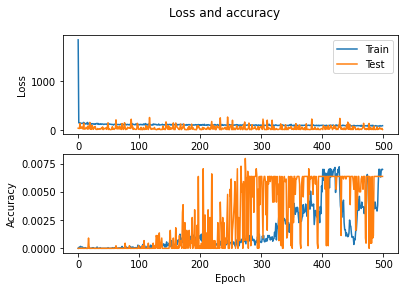

In [32]:
fig, ax = plt.subplots(2)
fig.suptitle('Loss and accuracy')


ax[0].plot(history.history['loss']) 
ax[0].plot(history.history['val_loss']) 
ax[0].set(xlabel='Epoch', ylabel='Loss') 
ax[0].legend(['Train', 'Test'], loc='upper right') 


ax[1].plot(history.history['accuracy'], label='accuracy')
ax[1].plot(history.history['val_accuracy'], label = 'val_accuracy')
ax[1].set(xlabel='Epoch', ylabel='Accuracy') 




[]

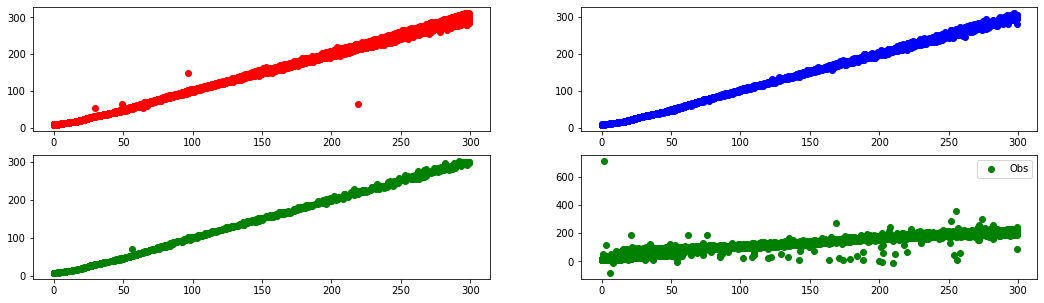

In [33]:
# PLots in case we have one label only

Xobs=rho
Xobs = preprocessing.StandardScaler().fit(Xobs).transform(Xobs.astype(float))
yobs=model.predict(Xobs)

Xobs2=rho2
Xobs2 = preprocessing.StandardScaler().fit(Xobs2).transform(Xobs2.astype(float))
yobs2=model.predict(Xobs2)

y_hat = model.predict(X_train)
y_pred = model.predict(X_test)



fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(18, 5))

ax[0,0].plot(y_train,y_hat[:,0],'ro', label='Train')
ax[0,1].plot(y_test,y_pred[:,0],'bo', label='Val')
ax[1,0].plot(vsini,yobs[:,0],'go', label='Test')
ax[1,1].plot(vsini2,yobs2[:,0],'go', label='Obs')
plt.legend()
plt.plot()





evaluation Training 3.3052132549164157
evaluation Validation 2.9478722267660094
evaluation Observation 3.1359821608635996
evaluation Observation2 35.60048312462912


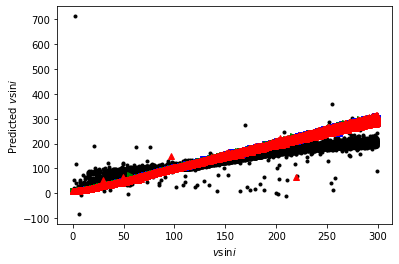

In [34]:
plt.plot(vsini2,yobs2[:,0],'k.', label='Observation')
plt.plot(y_test,y_pred[:,0],'bs', label='Validation')
plt.plot(vsini,yobs[:,0],'g>', label='Test')
plt.plot(y_train,y_hat[:,0],'r^', label='Training')

plt.xlabel("$v \sin i$")
plt.ylabel("Predicted $v \sin i$")

eval_train=(1/len(y_train))*((abs(y_hat[:,0]-y_train)**2).sum())
eval_test=(1/len(y_test))*((abs(y_pred[:,0]-y_test)**2).sum())
eval_obs=(1/len(vsini))*((abs(yobs[:,0]-vsini)**2).sum())
eval_obs2=(1/len(vsini2))*((abs(yobs2[:,0]-vsini2)**2).sum())

eval_train=eval_train**0.5
eval_test=eval_test**0.5
eval_obs=eval_obs**0.5
eval_obs2=eval_obs2**0.5

print("evaluation Training", eval_train)
print("evaluation Validation", eval_test)
print("evaluation Observation", eval_obs)
print("evaluation Observation2", eval_obs2)



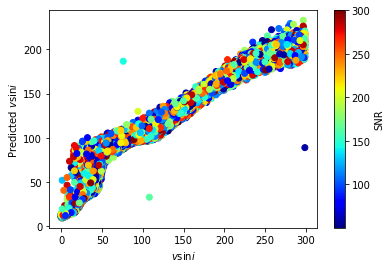

34.02263415377202


In [35]:
### Evaluation S/N

sn2=[]
for i in np.arange(len(lst2)):
    sn2.append(float(lst2[i][92:-4]))
temp2=np.array(temp2)
yobs2=np.array(yobs2)
sn2=np.array(sn2)
vsini2=np.array(vsini2)
grav2=np.array(grav2)
meta2=np.array(meta2)
#_______________________
mask=(sn2>50)&(vsini2<300)&(temp2>=7000)&(grav2>=2.0)
#-------------------------

vin=vsini2[mask]
ys=yobs2[mask][:,0]
c2=sn2[mask]
plt.colorbar(plt.scatter(vin, ys, c=c2, cmap=plt.cm.jet)).set_label('SNR')

#.legend('Observations with SNR>10')

eval_obs2=0
for i in np.arange(len(vin)):
    eval_obs2=eval_obs2+abs((ys[i]-vin[i])**2)
eval_obs2=eval_obs2/len(vin)
eval_obs2=eval_obs2**0.5

plt.xlabel("$v \sin i$")
plt.ylabel("Predicted $v \sin i$")



plt.show()
print(eval_obs2)

